![netflix_header](netflix_header.png)


# Netflix Top 10: Analyzing Weekly Chart-Toppers

This dataset comprises Netflix's weekly top 10 lists for the most-watched TV shows and films worldwide. The data spans from June 28, 2021, to August 27, 2023.

This workspace is pre-loaded with two CSV files. 
- `netflix_top10.csv` contains columns such as `show_title`, `category`, `weekly_rank`, and several view metrics.
- `netflix_top10_country.csv` has information about a show or film's performance by country, contained in the columns `cumulative_weeks_in_top_10` and `weekly_rank`.

We've added some guiding questions for analyzing this exciting dataset! Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells. 

[Source: Netflix](https://www.netflix.com/tudum/top10/united-states?week=2023-08-27) 

## Explore this dataset

To get you started with your analysis...
1. Combine the different categories of top 10 lists in a single weekly top 10 list spanning all categories
2. Are there consistent trends or patterns in the content format (tv, film) that make it to the top 10 over different weeks or months?
3. Explore your country's top 10 trends. Are there unique preferences or regional factors that set your country's list apart from others?
4. Visualize popularity ranking over time through time series plots

### 🔍 **Scenario: Understanding the Impact of Content Duration on Netflix's Top 10 Lists**

This scenario helps you develop an end-to-end project for your portfolio.

Background: As a data scientist at Netflix, you're tasked with exploring the dataset containing weekly top 10 lists of the most-watched TV shows and films. For example, you're tasked to find out what the relationship is between duration and ranking over time. Answering this question can inform content creators and strategists on how to optimize their offerings for the platform.

**Objective**: Determine if there's a correlation between content duration and its likelihood of making it to the top 10 lists.

You can query the pre-loaded CSV files using SQL directly. Here’s a **sample query**:

In [1]:
SELECT show_title, MAX(cumulative_weeks_in_top_10) as max_cumulative_weeks_in_top_10
FROM 'netflix_top10_country.csv'
WHERE country_name = 'Argentina'
GROUP BY show_title
ORDER BY max_cumulative_weeks_in_top_10 DESC
LIMIT 3;

,show_title,max_cumulative_weeks_in_top_10
0,Pasión de Gavilanes,82
1,Café con aroma de mujer,31
2,"Yo soy Betty, la fea",31


## Libraries

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # ou RandomForestClassifier si y est une variable catégorielle
from sklearn.metrics import mean_squared_error, r2_score  # pour évaluer la performanc

## EDA

In [3]:
global_top_10 = pd.read_csv("netflix_top10.csv", index_col=0)
print(global_top_10.shape)
global_top_10.head(20)

(4520, 10)


,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
week,,,,,,,,,,
2023-08-27,Films (English),1,The Monkey King,NaN,23200000,1.6167,14400000.0,2,False,NaN
2023-08-27,Films (English),2,Heart of Stone,NaN,28500000,2.1000,13600000.0,3,False,NaN
2023-08-27,Films (English),3,You Are So Not Invited to My Bat Mitzvah,NaN,21300000,1.7333,12300000.0,1,False,NaN
2023-08-27,Films (English),4,Street Kings,NaN,10300000,1.8167,5700000.0,2,False,NaN
2023-08-27,Films (English),5,The Boss Baby,NaN,9000000,1.6333,5500000.0,10,False,NaN
2023-08-27,Films (English),6,Jurassic World: Fallen Kingdom,NaN,10100000,2.1333,4700000.0,1,False,NaN
2023-08-27,Films (English),7,The Pope's Exorcist,NaN,6500000,1.7333,3800000.0,2,False,NaN
2023-08-27,Films (English),8,Half Brothers,NaN,5900000,1.6000,3700000.0,2,False,NaN
2023-08-27,Films (English),9,Madagascar,NaN,4800000,1.4333,3300000.0,1,False,NaN


In [4]:
countries_top_10 = pd.read_csv("netflix_top10_country.csv", index_col=0)
print(countries_top_10.shape)
countries_top_10.head()

(210880, 7)


,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
country_name,,,,,,,
Argentina,AR,2023-08-27,Films,1,On the Line,NaN,1
Argentina,AR,2023-08-27,Films,2,Half Brothers,NaN,2
Argentina,AR,2023-08-27,Films,3,Street Kings,NaN,3
Argentina,AR,2023-08-27,Films,4,You Are So Not Invited to My Bat Mitzvah,NaN,1
Argentina,AR,2023-08-27,Films,5,Heart of Stone,NaN,3


In [5]:
single_weekly_top_10 = global_top_10.sort_values(by="weekly_views", ascending=False).iloc[:10]
single_weekly_top_10

,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
week,,,,,,,,,,
2023-06-18,Films (English),1,Extraction 2,NaN,88400000,2.0667,42800000.0,1,False,NaN
2023-06-25,Films (English),1,Extraction 2,NaN,87300000,2.0667,42200000.0,2,False,NaN
2023-08-20,Films (English),1,Heart of Stone,NaN,74000000,2.1000,35200000.0,2,False,NaN
2023-08-13,Films (English),1,Heart of Stone,NaN,69600000,2.1000,33100000.0,1,False,NaN
2023-07-16,Films (English),1,The Out-Laws,NaN,46300000,1.6167,28600000.0,2,False,NaN
2023-08-06,Films (English),1,Hidden Strike,NaN,40500000,1.7167,23600000.0,2,False,NaN
2023-07-30,Films (English),1,Hidden Strike,NaN,37800000,1.7167,22000000.0,1,False,NaN
2023-07-09,Films (English),1,The Out-Laws,NaN,31700000,1.6167,19600000.0,1,False,NaN
2023-07-23,Films (Non-English),1,Bird Box Barcelona,NaN,35500000,1.8667,19000000.0,2,False,NaN


In [6]:
global_top_10_reworked = global_top_10.drop(['show_title', 'season_title', 'episode_launch_details'], axis=1)
categorical_data = {}
for i, movie_type in enumerate(global_top_10_reworked["category"].unique()):
    categorical_data[movie_type] = i
for i, movie_type in enumerate(global_top_10_reworked["category"]):
    global_top_10_reworked["category"][i] = categorical_data[movie_type]

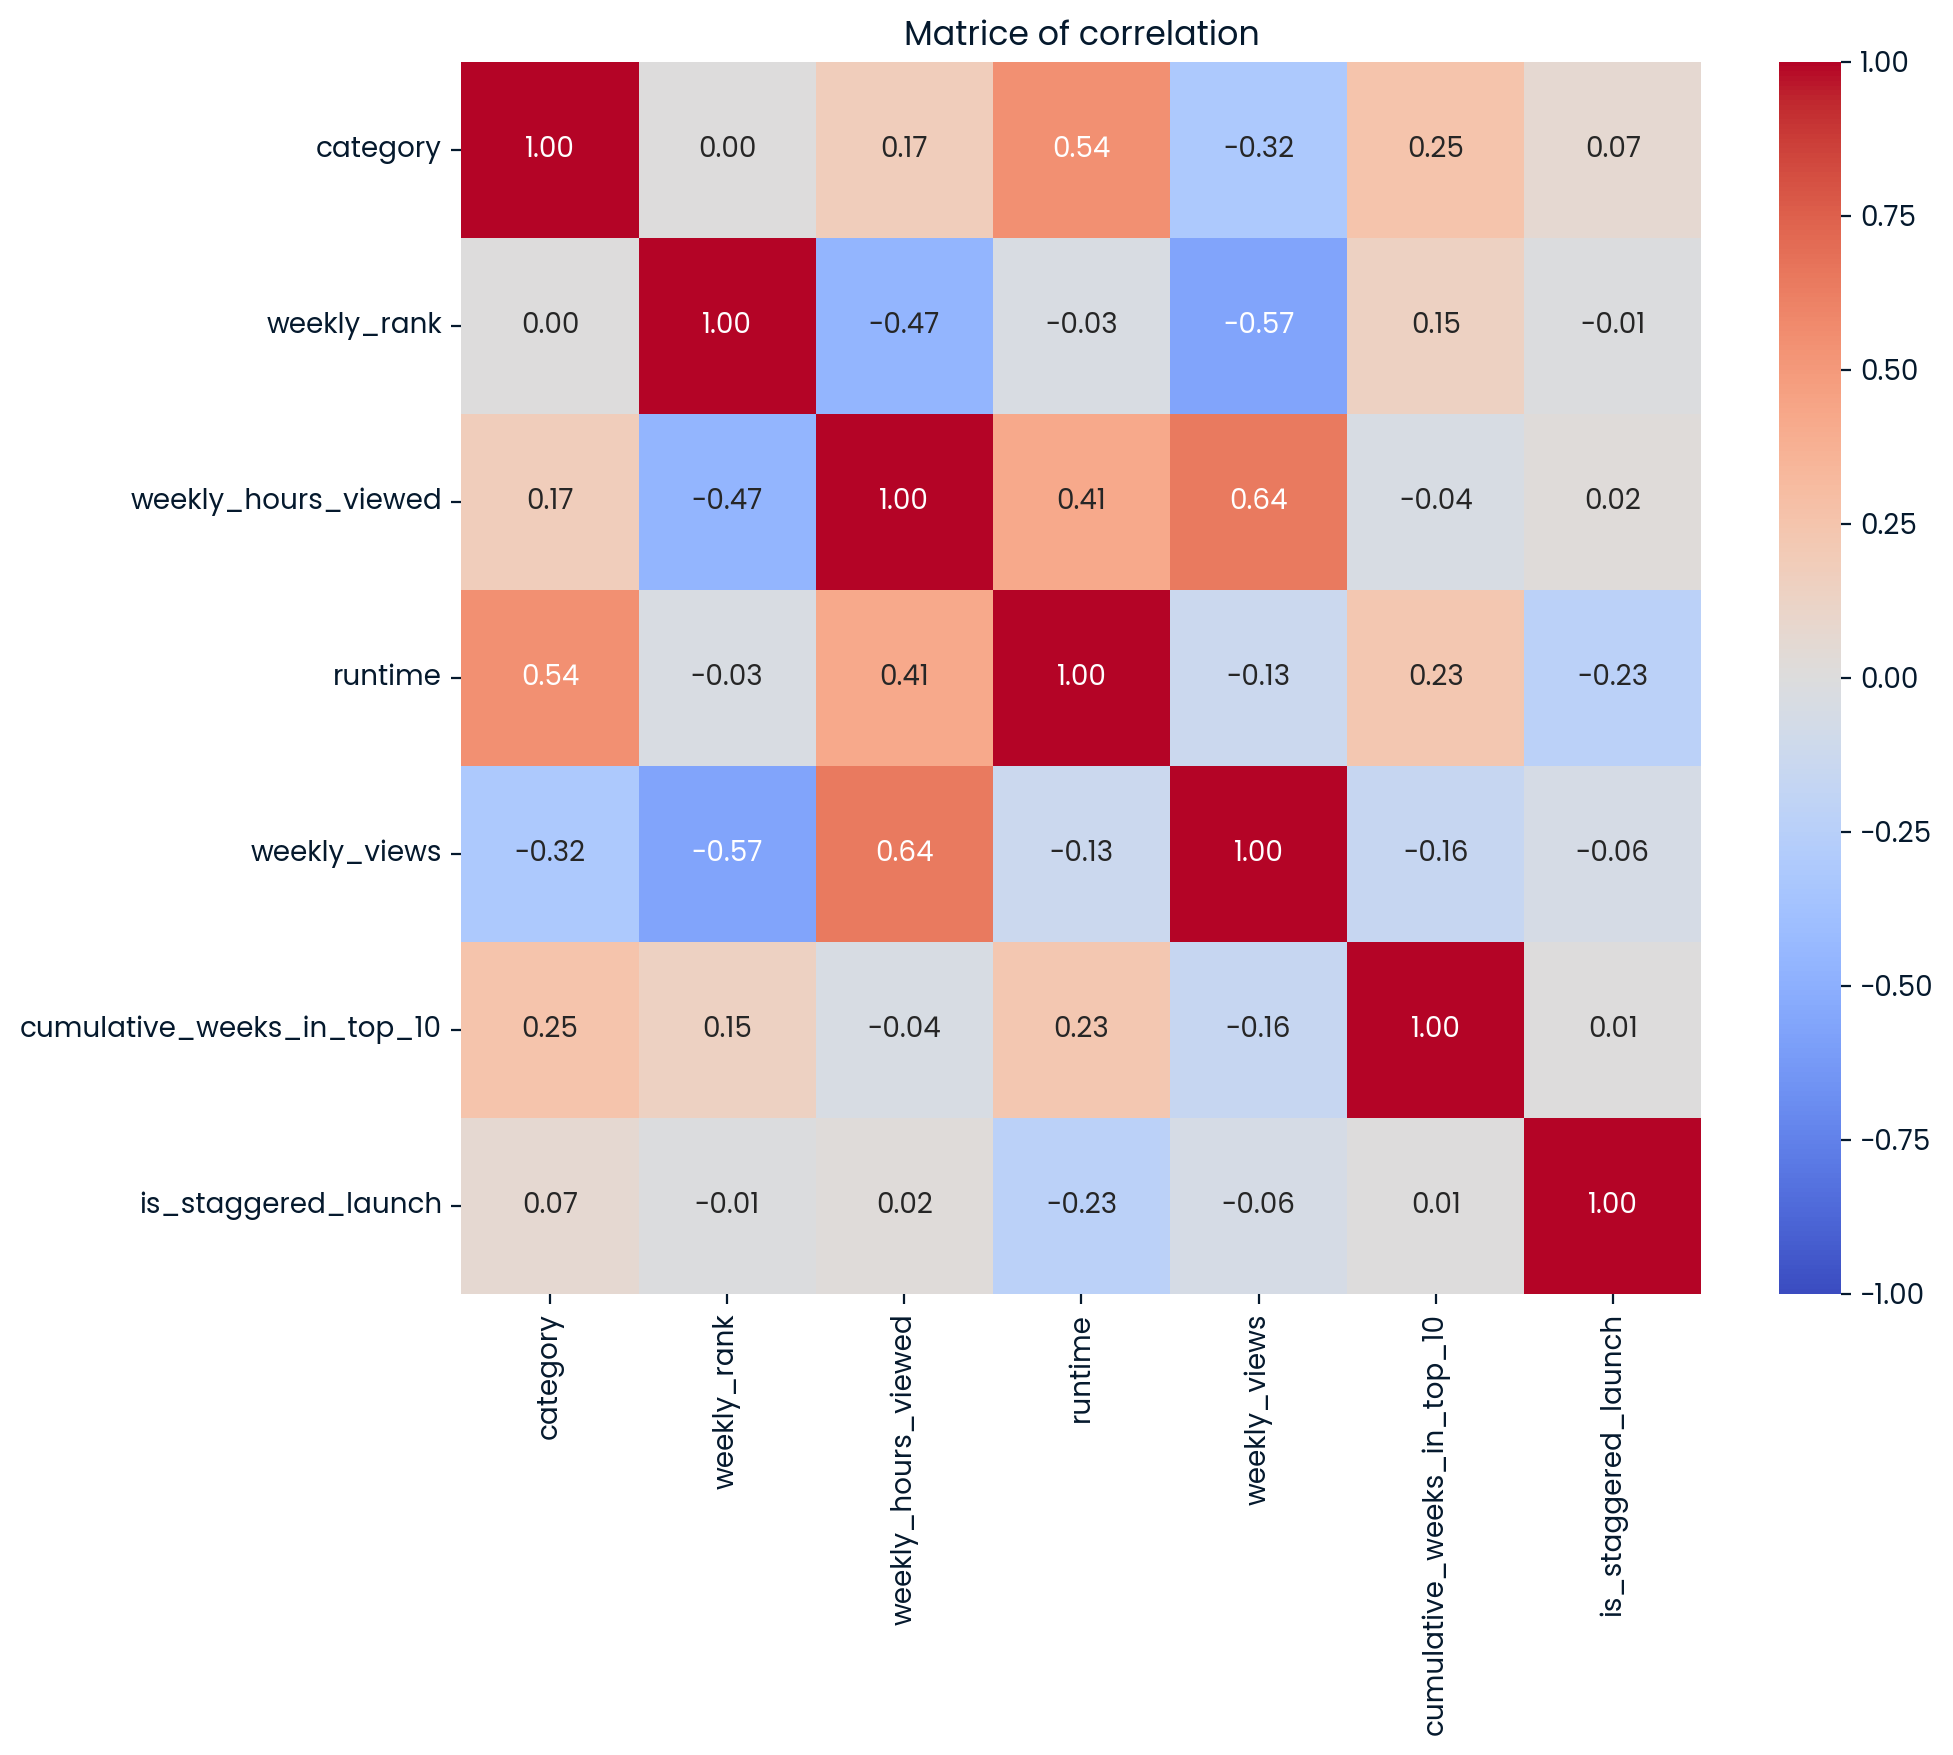

In [7]:
correlation_matrix = global_top_10_reworked.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice of correlation")
plt.show()

In [8]:
print("There is no correlation between the category and the weekly rank")
print("However we can see a small correlation between the category and how long it stay in the top 10")

There is no correlation between the category and the weekly rank
However we can see a small correlation between the category and how long it stay in the top 10


In [9]:
X = global_top_10_reworked.drop("weekly_rank", axis = 1) # Variables indépendantes
y = global_top_10_reworked['weekly_rank']  # Variable dépendante (cible)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Utilise RandomForestClassifier si y est une variable catégorielle


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 2.5941379601192986
R² Score: 0.6921587333702671


                      Feature  Importance
1         weekly_hours_viewed    0.703365
0                    category    0.208125
4  cumulative_weeks_in_top_10    0.057774
3                weekly_views    0.021139
2                     runtime    0.009326
5         is_staggered_launch    0.000271


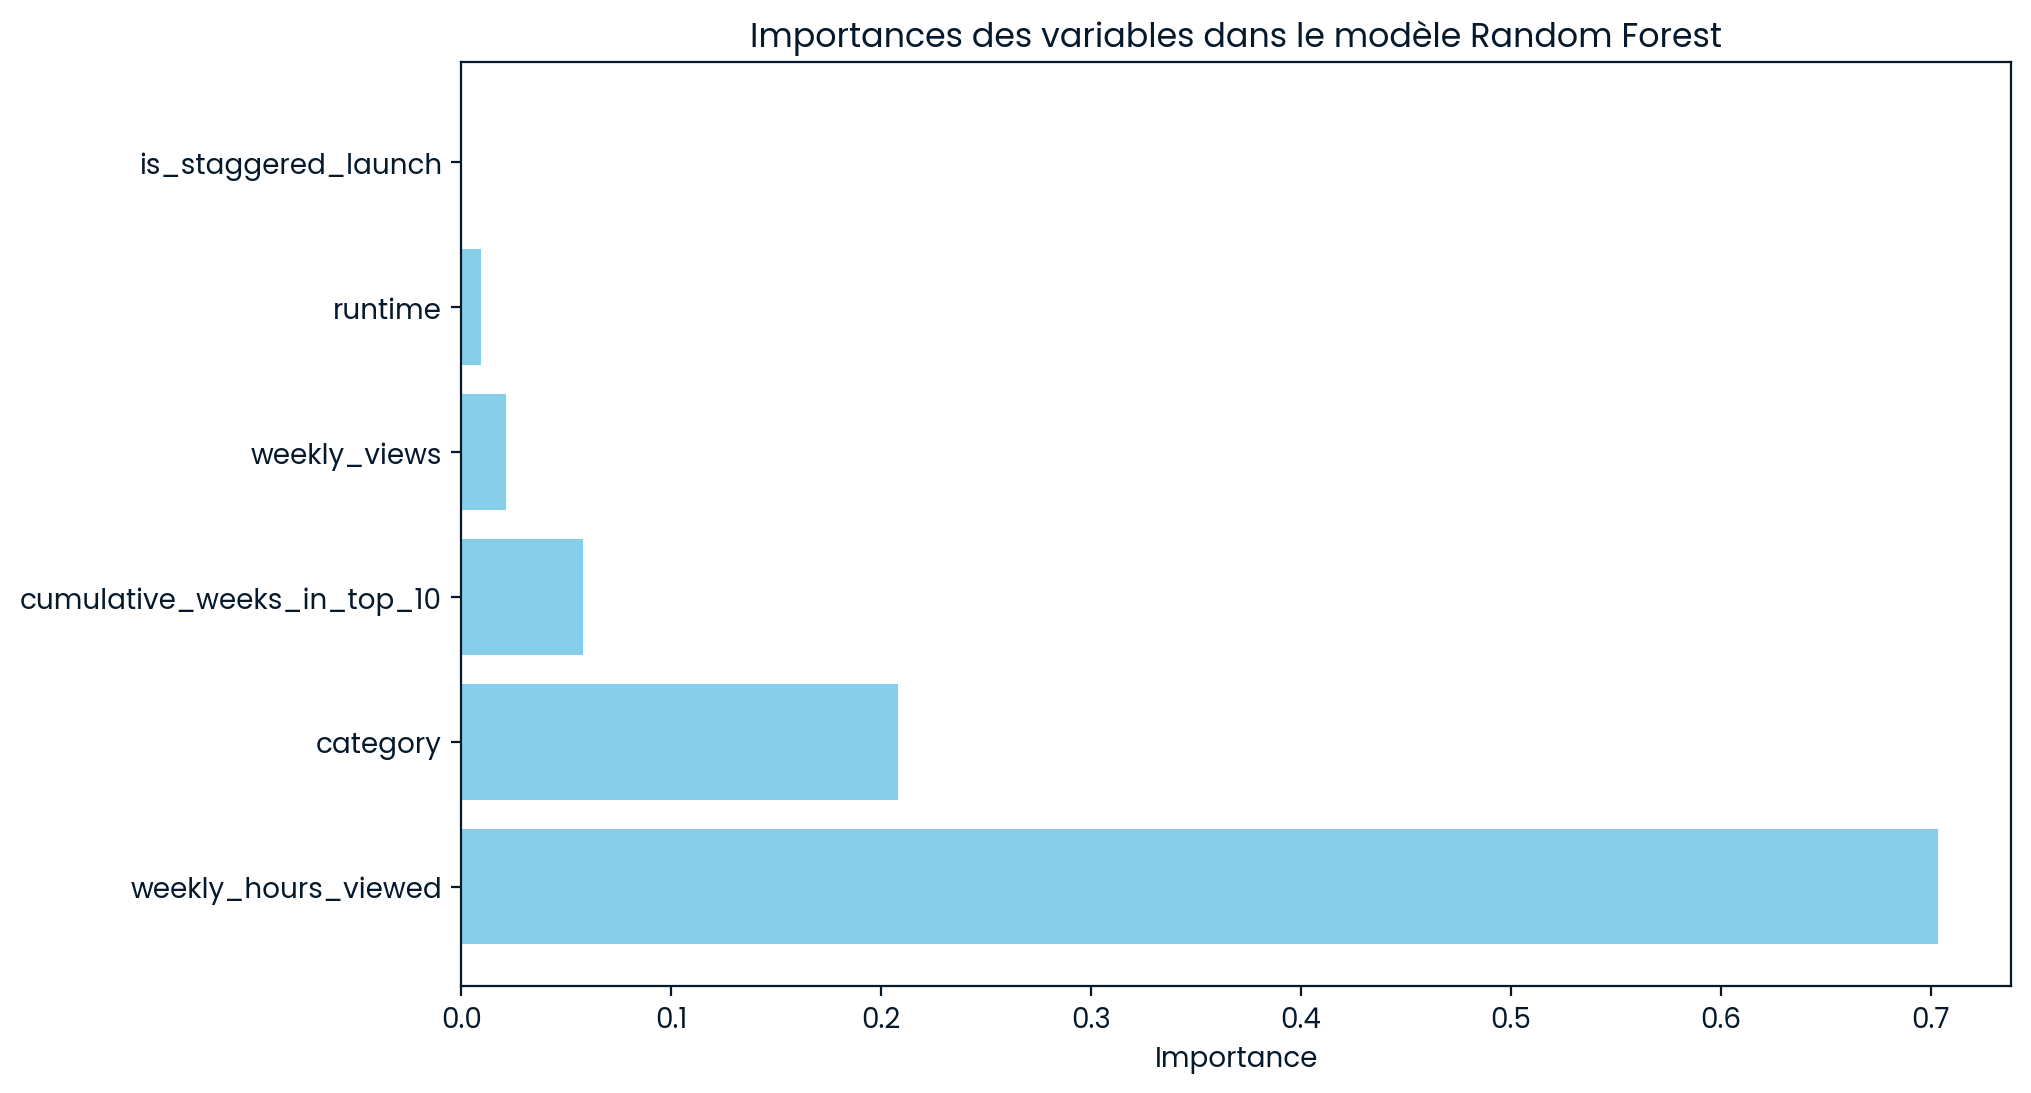

In [10]:
importances = rf.feature_importances_


importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


print(importance_df)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Importances des variables dans le modèle Random Forest')
plt.show()

Mean Squared Error: 7.444304111136295
R² Score: 0.11659902365264485
                      Feature  Importance
3  cumulative_weeks_in_top_10    0.401011
2                weekly_views    0.365096
0                    category    0.150275
1                     runtime    0.082188
4         is_staggered_launch    0.001431


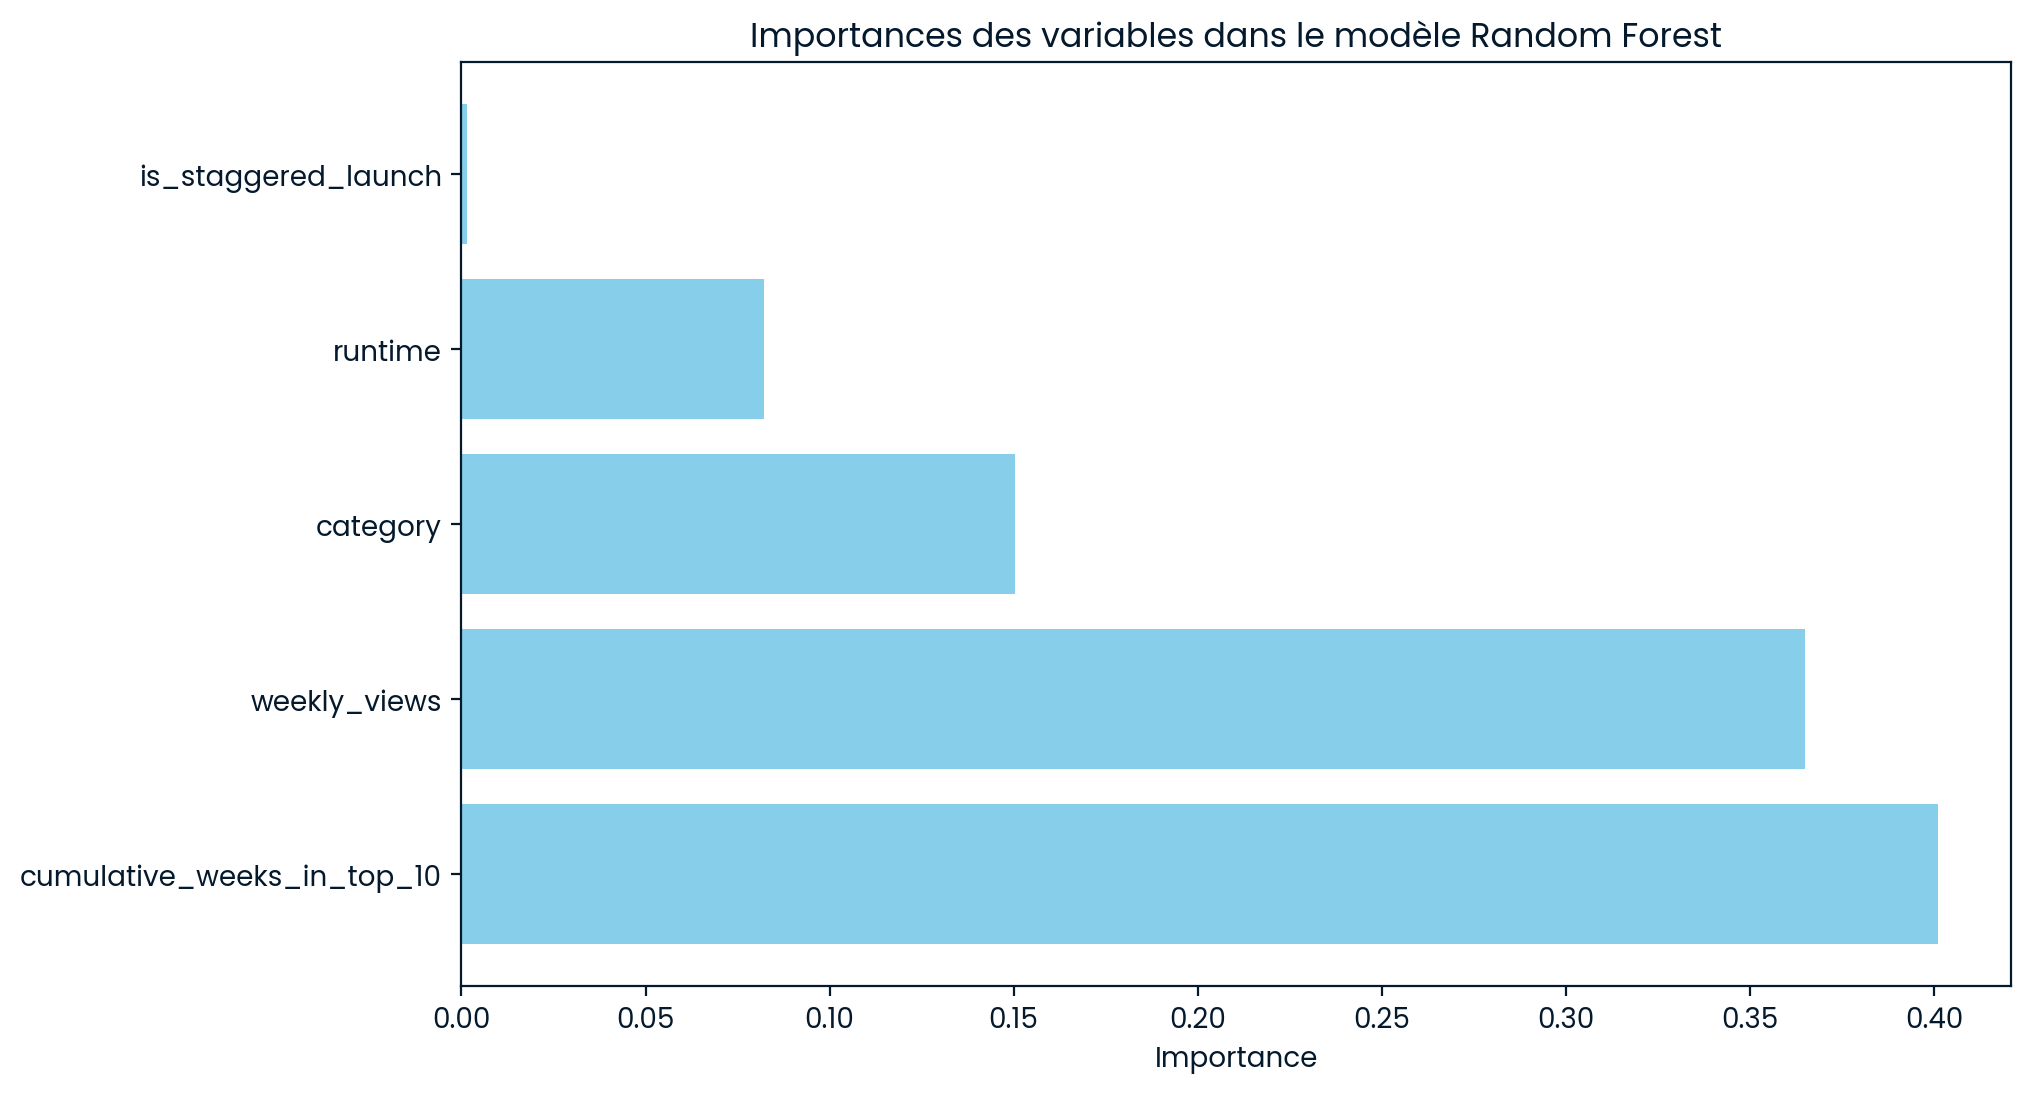

In [11]:

X = global_top_10_reworked.drop(["weekly_rank","weekly_hours_viewed"], axis = 1) 
y = global_top_10_reworked['weekly_rank']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42) 
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Évaluer la performance du modèle
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)  

print("Mean Squared Error:", mse)
print("R² Score:", r2)


importances = rf.feature_importances_


importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


print(importance_df)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Importances des variables dans le modèle Random Forest')
plt.show()

In [12]:
print("In conclusion, we have small correlation between the weekly_rank et the category. In addition, if we deleted the weekly hours viwed, it's really hard to predict the weekly rank and the category doesn't give much information for that")
print("There isn't any trends/pattern that explain the presence in the top 10")

In conclusion, we have small correlation between the weekly_rank et the category. In addition, if we deleted the weekly hours viwed, it's really hard to predict the weekly rank and the category doesn't give much information for that
There isn't any trends/pattern that explain the presence in the top 10


In [13]:
countries_top_10.columns

Index(['country_iso2', 'week', 'category', 'weekly_rank', 'show_title',
       'season_title', 'cumulative_weeks_in_top_10'],
      dtype='object')

In [14]:
df_france = countries_top_10[countries_top_10['country_iso2'] == 'FR']
df_france.head(10)

,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
country_name,,,,,,,
France,FR,2023-08-27,Films,1,Heart of Stone,NaN,3
France,FR,2023-08-27,Films,2,Escape Room: Tournament Of Champions,NaN,1
France,FR,2023-08-27,Films,3,The Monkey King,NaN,2
France,FR,2023-08-27,Films,4,Alice,NaN,1
France,FR,2023-08-27,Films,5,Le crocodile du Botswanga,NaN,1
France,FR,2023-08-27,Films,6,Don't Breathe 2,NaN,2
France,FR,2023-08-27,Films,7,The Boss Baby,NaN,3
France,FR,2023-08-27,Films,8,The Tourist,NaN,1
France,FR,2023-08-27,Films,9,Killer Book Club,NaN,1


In [15]:
category_counts = df_france['category'].value_counts()
print(category_counts)

top_titles_fr = df_france.groupby('show_title').size().sort_values(ascending=False)
print("\n Populaire titles in france :")
print(top_titles_fr.head(10))


show_frequency_fr = df_france.groupby('show_title')['cumulative_weeks_in_top_10'].max().sort_values(ascending=False)
print("\nFrequency of shows in the top 10 over several weeks (France) :")
print(show_frequency_fr.head(10))


category
Films    1130
TV       1130
Name: count, dtype: int64

 Populaire titles in france :
show_title
Manifest             38
Stranger Things      37
The Witcher          22
Outer Banks          21
You                  20
The Queen of Flow    19
New Amsterdam        18
Bridgerton           18
Elite                17
Money Heist          15
dtype: int64

Frequency of shows in the top 10 over several weeks (France) :
show_title
Manifest             14
Stranger Things      13
Bridgerton           11
Wednesday            11
Les Sisters          11
Squid Game           10
The Queen of Flow    10
Money Heist          10
Knives Out            9
The Night Agent       9
Name: cumulative_weeks_in_top_10, dtype: int64


In [16]:
category_counts = countries_top_10['category'].value_counts()
print(category_counts)

top_titles = countries_top_10.groupby('show_title').size().sort_values(ascending=False)
print("\n Populaire titles :")
print(top_titles.head(10))


show_frequency = countries_top_10.groupby('show_title')['cumulative_weeks_in_top_10'].max().sort_values(ascending=False)
print("\nFrequency of shows in the top 10 over several weeks :")
print(show_frequency.head(10))


category
Films    105440
TV       105440
Name: count, dtype: int64

 Populaire titles :
show_title
Stranger Things                     3258
Manifest                            2912
The Good Doctor                     2024
Money Heist                         1701
You                                 1654
The Witcher                         1625
Pasión de Gavilanes                 1455
Pablo Escobar, el patrón del mal    1359
Bridgerton                          1253
Wednesday                           1208
dtype: int64

Frequency of shows in the top 10 over several weeks :
show_title
Pasión de Gavilanes                 102
Pablo Escobar, el patrón del mal    102
Money Heist                          95
Chiquititas                          93
Crash Landing on You                 72
Red Notice                           70
Friends                              68
Café con aroma de mujer              68
PAW Patrol                           65
Itaewon Class                        64
Name: cumula

In [17]:
popular_titles = top_titles.head(10).index
popular_titles_fr = top_titles_fr.head(10).index


commun_title = 0
for title in popular_titles_fr:
    if title in popular_titles:
        commun_title += 1
print(f"There is {commun_title} title in commun in top 10 france and top 10 world")

There is 6 title in commun in top 10 france and top 10 world


In [18]:
popular_top_10_titles = show_frequency.head(10).index
popular_top_10_titles_fr = show_frequency_fr.head(10).index


commun_title_top_10 = 0
for title in popular_top_10_titles_fr:
    if title in popular_top_10_titles:
        commun_title_top_10 += 1
print(f"There is {commun_title_top_10} title in commun that is frequently in top 10 between france and world")

There is 1 title in commun that is frequently in top 10 between france and world


In [19]:
print("6 of the most viewed movie in france are in the top 10 most viewed movies. However the titles that stay the most in the top 10 world are cleary different than the one in the France")

6 of the most viewed movie in france are in the top 10 most viewed movies. However the titles that stay the most in the top 10 world are cleary different than the one in the France


In [20]:
global_top_10

,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
week,,,,,,,,,,
2023-08-27,Films (English),1,The Monkey King,NaN,23200000,1.6167,14400000.0,2,False,NaN
2023-08-27,Films (English),2,Heart of Stone,NaN,28500000,2.1000,13600000.0,3,False,NaN
2023-08-27,Films (English),3,You Are So Not Invited to My Bat Mitzvah,NaN,21300000,1.7333,12300000.0,1,False,NaN
2023-08-27,Films (English),4,Street Kings,NaN,10300000,1.8167,5700000.0,2,False,NaN
2023-08-27,Films (English),5,The Boss Baby,NaN,9000000,1.6333,5500000.0,10,False,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-07-04,TV (Non-English),6,Elite,Elite: Season 1,10530000,NaN,NaN,1,False,NaN
2021-07-04,TV (Non-English),7,Elite,Elite: Season 3,10200000,NaN,NaN,1,False,NaN
2021-07-04,TV (Non-English),8,Elite,Elite: Season 2,10140000,NaN,NaN,1,False,NaN


In [21]:
week_index = global_top_10.index
popularity_title = {}
for i, title in enumerate(global_top_10["show_title"]):
    if title not in popularity_title:
        popularity_title[title] = {}
    week = week_index[i]
    popularity_title[title][week] = global_top_10["weekly_views"][i]

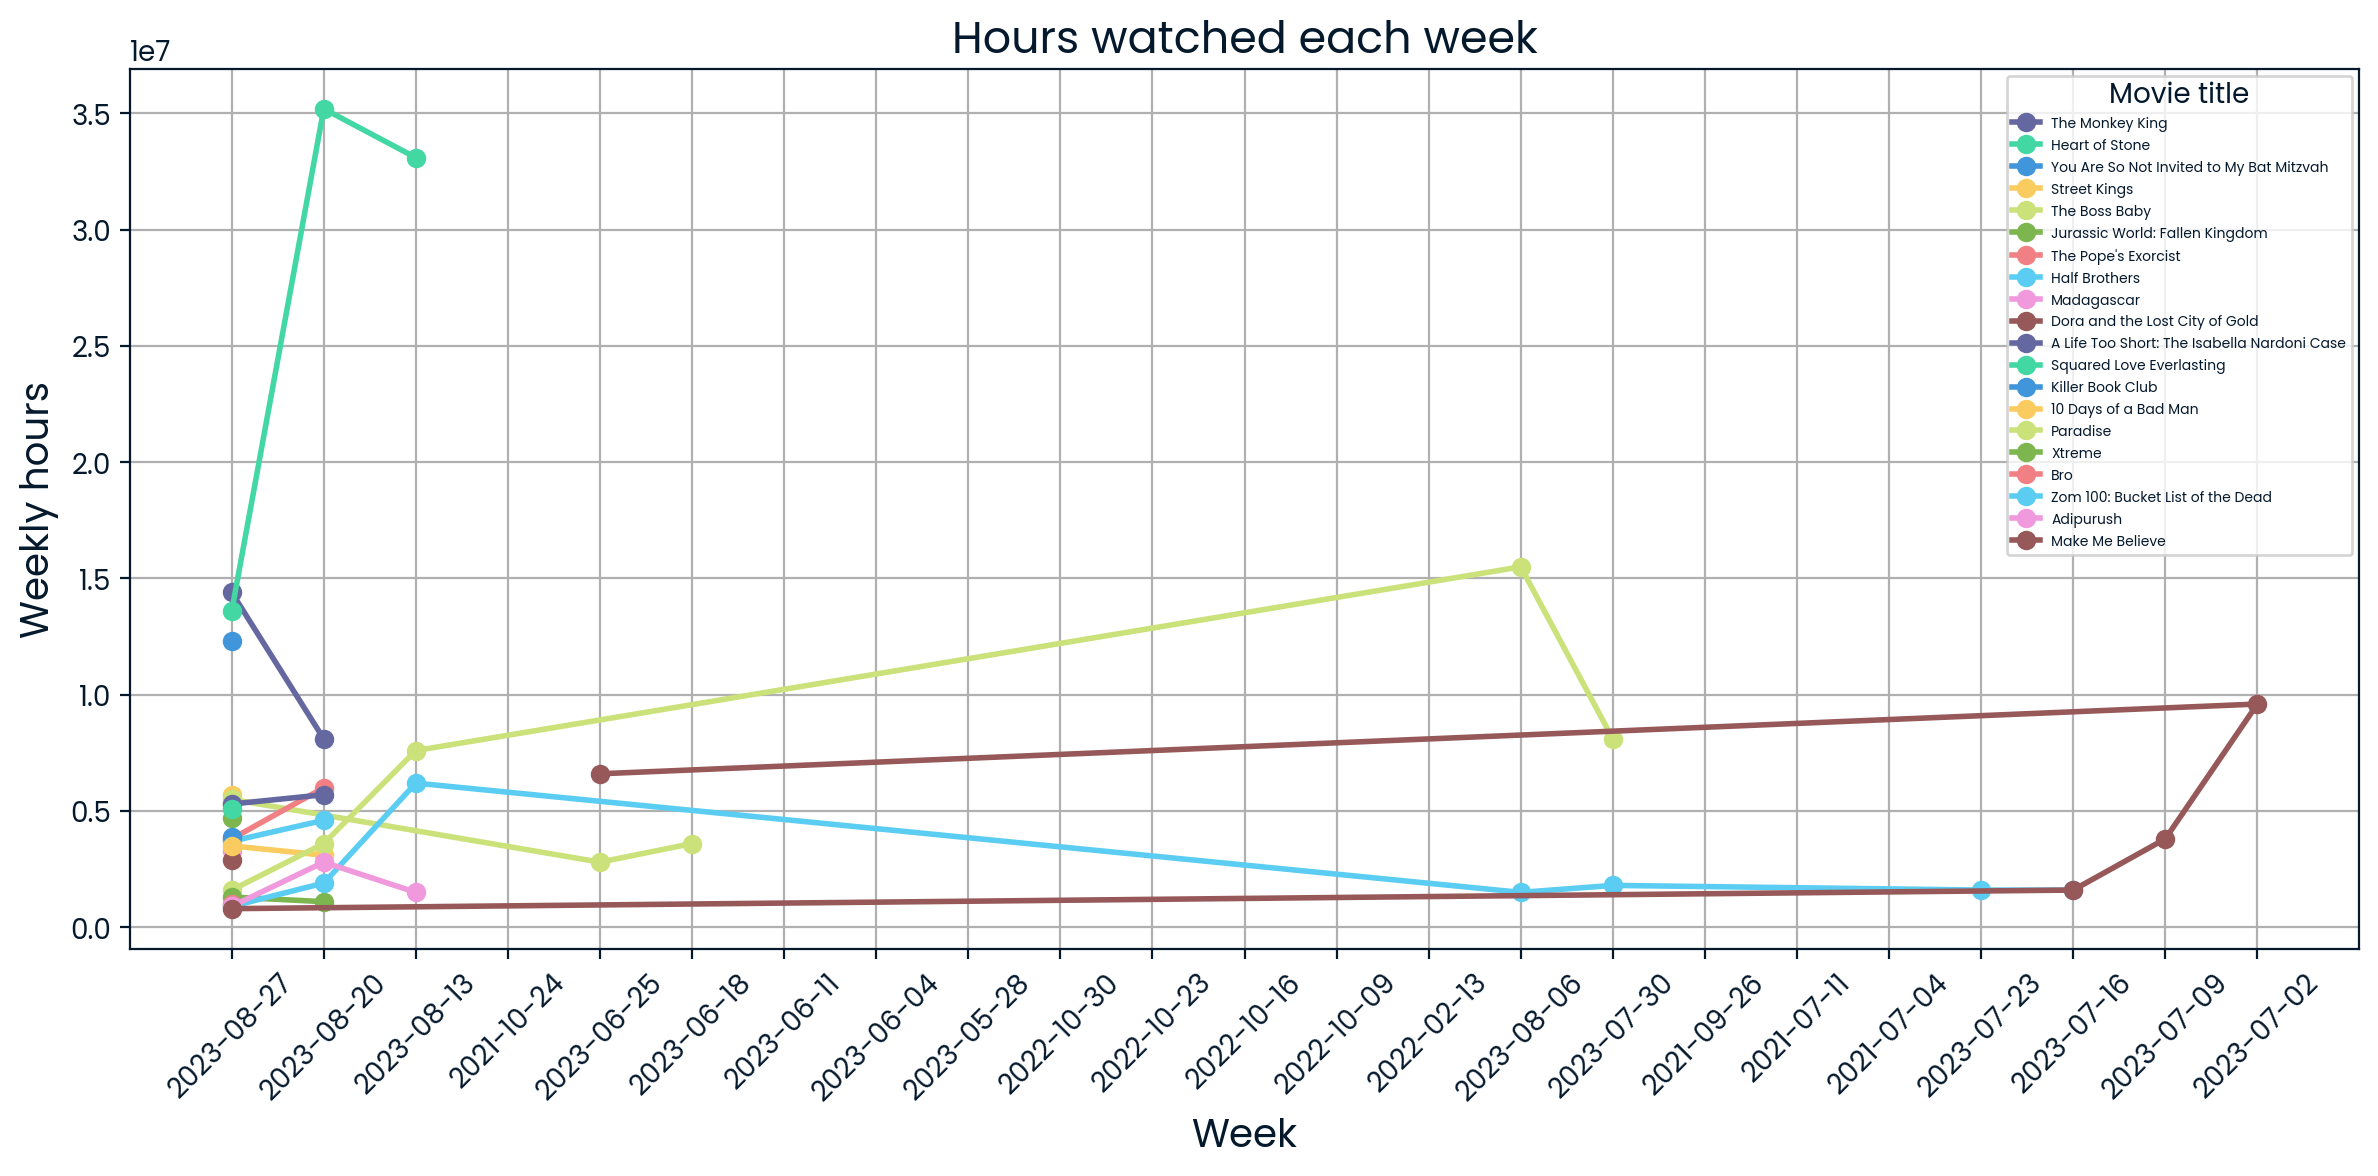

In [22]:
n = 20
first_n_titles = list(popularity_title.items())[:n]

plt.figure(figsize=(12, 6))
for title, weekly_hours in first_n_titles:
    weeks = list(weekly_hours.keys())
    weekly_hours = list(weekly_hours.values())
    plt.plot(weeks, weekly_hours, marker='o', label=title, linewidth=2)

plt.title("Hours watched each week", fontsize=16)
plt.xlabel("Week", fontsize=14)
plt.ylabel("Weekly hours", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Movie title", fontsize=5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
week_index = global_top_10.index
ranking_title = {}
for i, title in enumerate(global_top_10["show_title"]):
    if title not in ranking_title:
        ranking_title[title] = {}
    week = week_index[i]
    ranking_title[title][week] = global_top_10["weekly_rank"][i]

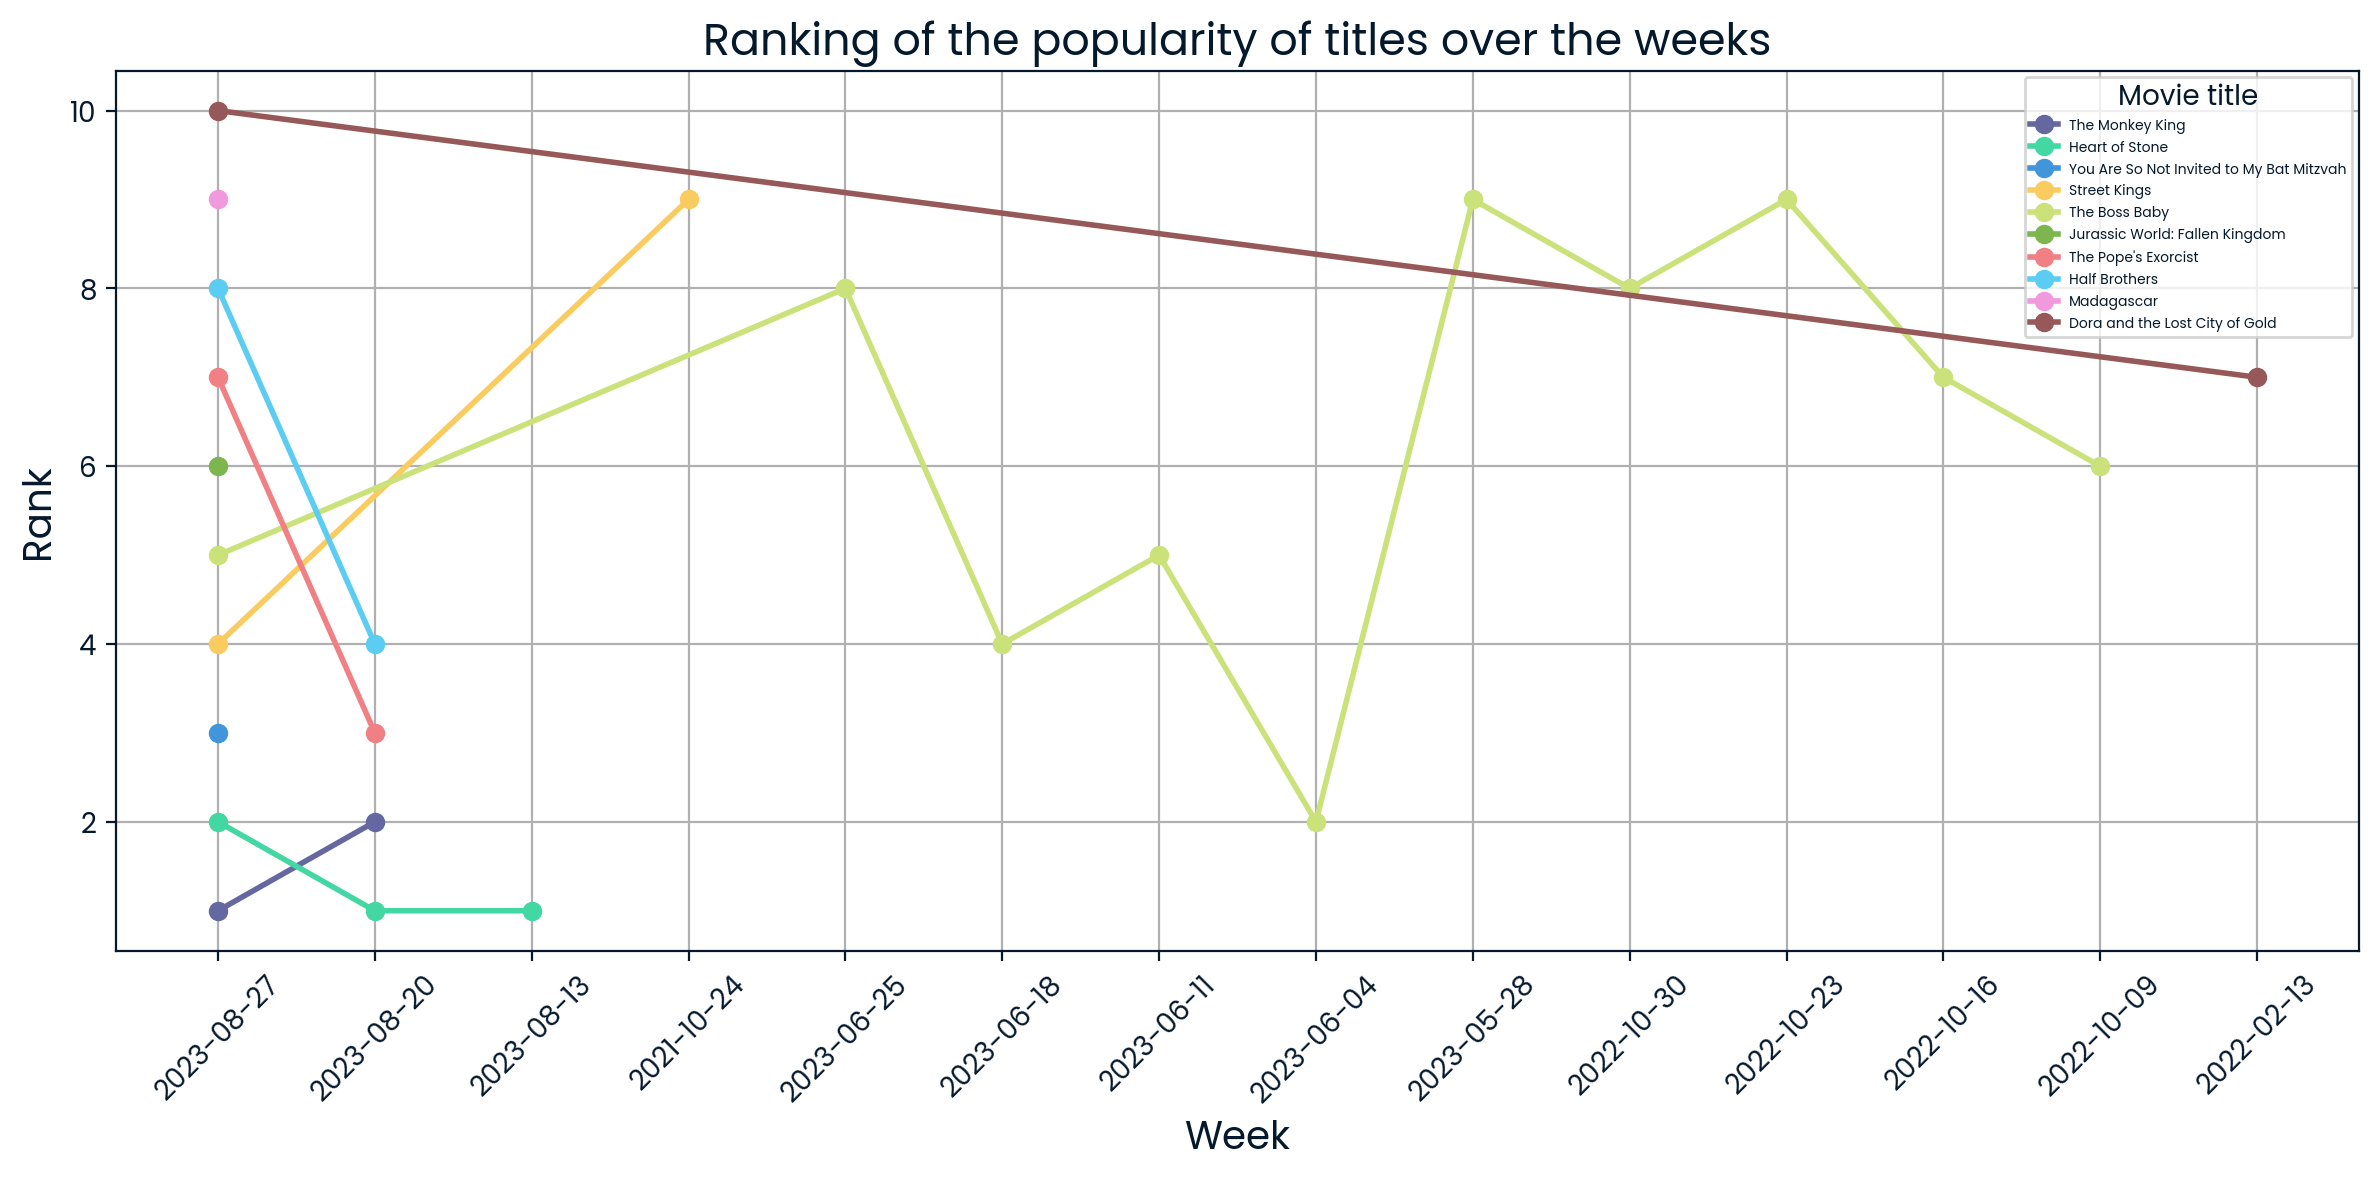

In [24]:
n = 10
first_n_titles = list(ranking_title.items())[:n]

plt.figure(figsize=(12, 6))
for title, rankings in first_n_titles:
    weeks = list(rankings.keys())
    rank = list(rankings.values())
    plt.plot(weeks, rank, marker='o', label=title, linewidth=2)

plt.title("Ranking of the popularity of titles over the weeks", fontsize=16)
plt.xlabel("Week", fontsize=14)
plt.ylabel("Rank", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Movie title", fontsize=5)
plt.grid(True)
plt.tight_layout()
plt.show()